# Web scarping Aqar website:

In [51]:
# import the webscraping libraries
from bs4 import BeautifulSoup
import requests

# import Data analysis libraries
import pandas as pd
import numpy as np

# import visalization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

In [ ]:
# define the lists
sub_url = []

areas, prices, direction, bed, path, living, steetwidth, House_age, views = [], [], [], [], [], [], [], [], []

In [ ]:
# loop in all the main pages to get all the sub urls in the range specified
for i in range(1,150):
    main_url = "https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/"+str(i)
    response= requests.get(main_url)
    page = response.text
    soup = BeautifulSoup(page, "html")
    
    for element in soup.find_all('a', {'class':"listTitle"}):
        sub_url.append(element["href"])
    


In [ ]:
# function to extract the information from the sub url's
def extract_info ():
    
    for s in sub_url:
        
        response = requests.get('https://sa.aqar.fm'+s)
        page = response.text
        soup = BeautifulSoup(page, "html.parser")
        
        if soup.find("span", class_="listingPagePrice") is None :
            prices.append(np.na)
        else:
            prices.append(soup.find("span", class_="listingPagePrice").find("span").findNext().text) 
            
        if soup.find(text="المساحة") is None:
            areas.append(np.na)
        else:
            areas.append(soup.find(text="المساحة").find_previous().find_previous().find_previous().text)
            
        if soup.find(text="الواجهة") is None:
            direction.append(np.na)
        else:
            direction.append(soup.find(text="الواجهة").find_previous().find_previous().find_previous().text)
        
        if soup.find(text="غرف النوم") is None:
            bed.append(np.na)
        else:
            bed.append(soup.find(text="غرف النوم").find_previous().find_previous().find_previous().text)
        
        if soup.find(text="الصالات") is None :
            living.append(np.na)
        else:
            living.append(soup.find(text="الصالات").find_previous().find_previous().find_previous().text)
        
        if soup.find(text="دورات مياه") is None:
            path.append(np.na)
        else:
            path.append(soup.find(text="دورات مياه").find_previous().find_previous().find_previous().text)
        
        if soup.find(text="عرض الشارع") is None:
            steetwidth.append(np.na)
        else:
            steetwidth.append(soup.find(text="عرض الشارع").find_previous().find_previous().find_previous().text)
            
        if soup.find(text="عمر العقار") is None:
            House_age.append(np.na)
        else:
            House_age.append(soup.find(text="عمر العقار").find_previous().find_previous().find_previous().text)
        
        if soup.find("table", class_="dc-listingInfoTable") is None:
            views.append(np.na)
        else:
            views.append(soup.find("table", class_="dc-listingInfoTable").find("span").text) 

In [ ]:
# Call the function 
extract_info()

In [ ]:
# Convert it to two dataframe (raw_df and df)
raw_df = pd.DataFrame(list(zip(prices,areas,direction,bed,living,path,steetwidth,House_age,views)),
                      columns=["price","area","direction","bed","living","path","street_width","house_age","views"]) 

df = pd.DataFrame(list(zip(prices,areas,direction,bed,living,path,steetwidth,House_age,views)),
                  columns=["price","area","direction","bed","living","path","street_width","house_age","views"]) 

In [ ]:
#df = df.replace(0, pd.np.nan).dropna(axis=0, how='any') #pointless

In [ ]:
# after dropping
#df_r.shape #pointless

In [ ]:
# Save it in csv format for easier access
df.to_csv('aqar.csv',index=True)

In [2]:
# Read the csv file
df_r = pd.read_csv('aqar.csv')

# EDA:

In [3]:
# display the dataframe
df_r

Unnamed: 0      price     area  direction  bed  living  path  \
0              0  2,000,000   408 م²       جنوب    7       5     5   
1              1  4,000,000  1200 م²        شرق    7       5     5   
2              2  1,850,000   338 م²        غرب    7       2     5   
3              4  4,250,000   675 م²        شرق    7       3     5   
4              5    650,000   600 م²       جنوب    7       1     5   
...          ...        ...      ...        ...  ...     ...   ...   
6019        8184  2,800,000   725 م²  شمال غربي    6       1     5   
6020        8185    850,000   400 م²        شرق    5       1     5   
6021        8187  1,100,000   360 م²       شمال    5       2     5   
6022        8188  1,030,000   250 م²        غرب    4       1     4   
6023        8189  1,300,000   360 م²       شمال    5       3     5   

     street_width house_age  views  
0            15 م     7 سنة   1583  
1            15 م     9 سنة    224  
2            20 م     7 سنة   2435  
3            20 م    10 سنة   1488  
4            15 م      جديد   2863  
...           ...       ...    ...  
6019         15 م    36 سنة  10586  
6020         20 م      جديد    304  
6021         15 م      جديد    756  
6022         18 م      جديد     74  
6023         18 م      جديد    136  

[6024 rows x 10 columns]

In [4]:
# shallow copy
df_copy = df_r.copy()

In [5]:
# drop first column in csv as index (Unnamed: 0)
df_r.drop('Unnamed: 0',axis='columns', inplace=True)

In [6]:
# check after dropping
df_r

price     area  direction  bed  living  path street_width house_age  \
0     2,000,000   408 م²       جنوب    7       5     5         15 م     7 سنة   
1     4,000,000  1200 م²        شرق    7       5     5         15 م     9 سنة   
2     1,850,000   338 م²        غرب    7       2     5         20 م     7 سنة   
3     4,250,000   675 م²        شرق    7       3     5         20 م    10 سنة   
4       650,000   600 م²       جنوب    7       1     5         15 م      جديد   
...         ...      ...        ...  ...     ...   ...          ...       ...   
6019  2,800,000   725 م²  شمال غربي    6       1     5         15 م    36 سنة   
6020    850,000   400 م²        شرق    5       1     5         20 م      جديد   
6021  1,100,000   360 م²       شمال    5       2     5         15 م      جديد   
6022  1,030,000   250 م²        غرب    4       1     4         18 م      جديد   
6023  1,300,000   360 م²       شمال    5       3     5         18 م      جديد   

      views  
0      1583  
1       224  
2      2435  
3      1488  
4      2863  
...     ...  
6019  10586  
6020    304  
6021    756  
6022     74  
6023    136  

[6024 rows x 9 columns]

In [7]:
# the shape before dropping the duplicate
df_r.shape

(6024, 9)

In [8]:
# drop the duplicate rows
df_r.drop_duplicates()

price     area  direction  bed  living  path street_width house_age  \
0     2,000,000   408 م²       جنوب    7       5     5         15 م     7 سنة   
1     4,000,000  1200 م²        شرق    7       5     5         15 م     9 سنة   
2     1,850,000   338 م²        غرب    7       2     5         20 م     7 سنة   
3     4,250,000   675 م²        شرق    7       3     5         20 م    10 سنة   
4       650,000   600 م²       جنوب    7       1     5         15 م      جديد   
...         ...      ...        ...  ...     ...   ...          ...       ...   
6019  2,800,000   725 م²  شمال غربي    6       1     5         15 م    36 سنة   
6020    850,000   400 م²        شرق    5       1     5         20 م      جديد   
6021  1,100,000   360 م²       شمال    5       2     5         15 م      جديد   
6022  1,030,000   250 م²        غرب    4       1     4         18 م      جديد   
6023  1,300,000   360 م²       شمال    5       3     5         18 م      جديد   

      views  
0      1583  
1       224  
2      2435  
3      1488  
4      2863  
...     ...  
6019  10586  
6020    304  
6021    756  
6022     74  
6023    136  

[4100 rows x 9 columns]

In [9]:
# the shape after dropping the duplicate
df_r.shape

(6024, 9)

In [10]:
# head
df_r.head(60)

price     area  direction  bed  living  path street_width house_age  \
0    2,000,000   408 م²       جنوب    7       5     5         15 م     7 سنة   
1    4,000,000  1200 م²        شرق    7       5     5         15 م     9 سنة   
2    1,850,000   338 م²        غرب    7       2     5         20 م     7 سنة   
3    4,250,000   675 م²        شرق    7       3     5         20 م    10 سنة   
4      650,000   600 م²       جنوب    7       1     5         15 م      جديد   
5    3,000,000   656 م²  جنوب شرقي    7       2     5         15 م    19 سنة   
6    1,150,000   550 م²        شرق    7       1     5         15 م     6 سنة   
7    2,350,000   400 م²       شمال    5       2     5         15 م      جديد   
8    1,340,000   405 م²  شمال غربي    5       2     5         30 م      جديد   
9    1,550,000   301 م²        شرق    5       3     5         20 م      جديد   
10   3,700,000   360 م²       شمال    5       4     5         20 م      جديد   
11   1,450,000   960 م²  شمال غربي    7       5     5         20 م    25 سنة   
12   1,700,000   275 م²        غرب    4       3     5         20 م      جديد   
13     790,000   200 م²       جنوب    6       2     5         15 م      جديد   
14   2,000,000   945 م²  جنوب شرقي    7       3     5         15 م    23 سنة   
15     935,000   364 م²       شمال    6       2     5         10 م      جديد   
16   1,650,000   900 م²       جنوب    5       5     5         25 م     2 سنة   
17   1,000,000   250 م²        غرب    5       2     5         20 م      جديد   
18   2,500,000   500 م²        شرق    7       2     5         15 م      جديد   
19   1,850,000   338 م²        غرب    7       2     5         20 م     7 سنة   
20   1,400,000   438 م²       شمال    7       2     5         16 م      جديد   
21   1,650,000   900 م²       جنوب    5       5     5         25 م     2 سنة   
22   1,600,000   360 م²  جنوب غربي    5       1     3         20 م    10 سنة   
23     835,000   610 م²        شرق    3       3     5         15 م      جديد   
24   1,350,000   300 م²        غرب    6       5     5         20 م      جديد   
25   1,000,000   375 م²        غرب    7       1     4         20 م     6 سنة   
26   2,350,000   400 م²       شمال    5       2     5         15 م      جديد   
27     850,000   400 م²        غرب    6       2     5         15 م      جديد   
28   6,250,000   675 م²        شرق    7       4     5         15 م    10 سنة   
29  10,000,000  1521 م²  شمال غربي    5       4     5         25 م     5 سنة   
30   1,200,000   297 م²       شمال    6       2     3         15 م    27 سنة   
31   1,150,000  4200 م²       شمال    7       2     5         30 م     3 سنة   
32   1,150,000   229 م²  جنوب غربي    4       2     5         15 م      جديد   
33   1,400,000   438 م²       شمال    7       2     5         16 م      جديد   
34   1,750,000   244 م²       شمال    7       2     5         18 م     5 سنة   
35     360,000   368 م²        شرق    7       4     5         20 م    36 سنة   
36   3,200,000   251 م²  جنوب شرقي    4       2     4         15 م      جديد   
37   6,800,000   600 م²  جنوب شرقي    5       3     5         20 م      جديد   
38   1,130,000   300 م²        غرب    5       3     5         15 م      جديد   
39   1,650,000   315 م²       شمال    5       3     5         15 م      جديد   
40   1,200,000   217 م²       شمال    4       1     3         19 م      جديد   
41     970,000   300 م²       جنوب    6       3     5         20 م      جديد   
42   1,300,000   330 م²       جنوب    5       3     5         20 م      جديد   
43   1,350,000   350 م²       جنوب    7       2     5         30 م      جديد   
44   2,700,000   650 م²  جنوب شرقي    7       2     5         30 م    18 سنة   
45   1,500,000   312 م²        غرب    5       2     5         15 م      جديد   
46     960,000   250 م²       شمال    7       2     5         20 م      جديد   
47   1,200,000   377 م²        غرب    5       1     5         20 م      جديد   
48   2,600,000   450 م²        شرق    4       3     2         20 م      جديد   
49   2,30

In [11]:
# check the data types and nulls values
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         6024 non-null   object
 1   area          6024 non-null   object
 2   direction     6024 non-null   object
 3   bed           6024 non-null   int64 
 4   living        6024 non-null   int64 
 5   path          6024 non-null   int64 
 6   street_width  6024 non-null   object
 7   house_age     6024 non-null   object
 8   views         6024 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 423.7+ KB


In [12]:
# to remove all the commas in price column
df_r.replace(',','', regex=True, inplace=True)

In [13]:
# to remove the squared meter in area column
df_r.replace(' م²','', regex=True, inplace=True)

In [14]:
# to remove the meter in street_width column
df_r.replace(' م','', regex=True, inplace=True)

In [15]:
# check the updates 
df_r

price  area  direction  bed  living  path street_width house_age  \
0     2000000   408       جنوب    7       5     5           15     7 سنة   
1     4000000  1200        شرق    7       5     5           15     9 سنة   
2     1850000   338        غرب    7       2     5           20     7 سنة   
3     4250000   675        شرق    7       3     5           20    10 سنة   
4      650000   600       جنوب    7       1     5           15      جديد   
...       ...   ...        ...  ...     ...   ...          ...       ...   
6019  2800000   725  شمال غربي    6       1     5           15    36 سنة   
6020   850000   400        شرق    5       1     5           20      جديد   
6021  1100000   360       شمال    5       2     5           15      جديد   
6022  1030000   250        غرب    4       1     4           18      جديد   
6023  1300000   360       شمال    5       3     5           18      جديد   

      views  
0      1583  
1       224  
2      2435  
3      1488  
4      2863  
...     ...  
6019  10586  
6020    304  
6021    756  
6022     74  
6023    136  

[6024 rows x 9 columns]

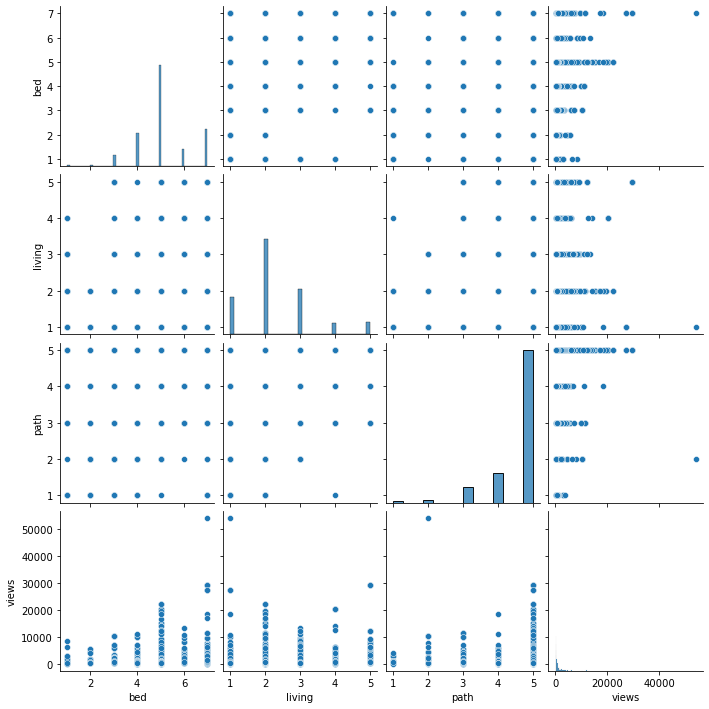

In [16]:
# Plot pairwise relationships in a dataset
sns.pairplot(df_r)

In [17]:
# View the correlations
df_r.corr()

bed    living      path     views
bed     1.000000  0.257816  0.320979  0.075414
living  0.257816  1.000000  0.297126  0.077804
path    0.320979  0.297126  1.000000 -0.018424
views   0.075414  0.077804 -0.018424  1.000000

In [18]:
import pandas_profiling as pp
profile = pp.ProfileReport(df_r)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model preparation:

In [19]:
#
def liner_reg(x_train, y_train, x_val, y_val):
    m = LinearRegression()
    m.fit(x_train, y_train)
    ts = round(m.score(x_train,y_train),5)
    vs = round(m.score(x_val,y_val),5)
    print("training score:", round(m.score(x_train,y_train),5))
    print("validation score:", round(m.score(x_val,y_val),5))
    return m

In [20]:
train , test = train_test_split(df_r, test_size=.2)
train , val = train_test_split(train, test_size=.25)

In [21]:
x_train =train.drop(['price'],axis=1)
y_train =train['price']

x_val = val.drop(['price'],axis=1)
y_val = val['price']

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 380 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         3614 non-null   object
 1   area          3614 non-null   object
 2   direction     3614 non-null   object
 3   bed           3614 non-null   int64 
 4   living        3614 non-null   int64 
 5   path          3614 non-null   int64 
 6   street_width  3614 non-null   object
 7   house_age     3614 non-null   object
 8   views         3614 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 282.3+ KB


In [23]:
train = train.astype({'price': 'int64','area':'int64','street_width':'int64'})

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 380 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         3614 non-null   int64 
 1   area          3614 non-null   int64 
 2   direction     3614 non-null   object
 3   bed           3614 non-null   int64 
 4   living        3614 non-null   int64 
 5   path          3614 non-null   int64 
 6   street_width  3614 non-null   int64 
 7   house_age     3614 non-null   object
 8   views         3614 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 282.3+ KB


In [25]:
num_cols = train.select_dtypes(exclude=['object']).columns
cat_cols = train.select_dtypes(include=['object']).columns

In [26]:
num_cols

Index(['price', 'area', 'bed', 'living', 'path', 'street_width', 'views'], dtype='object')

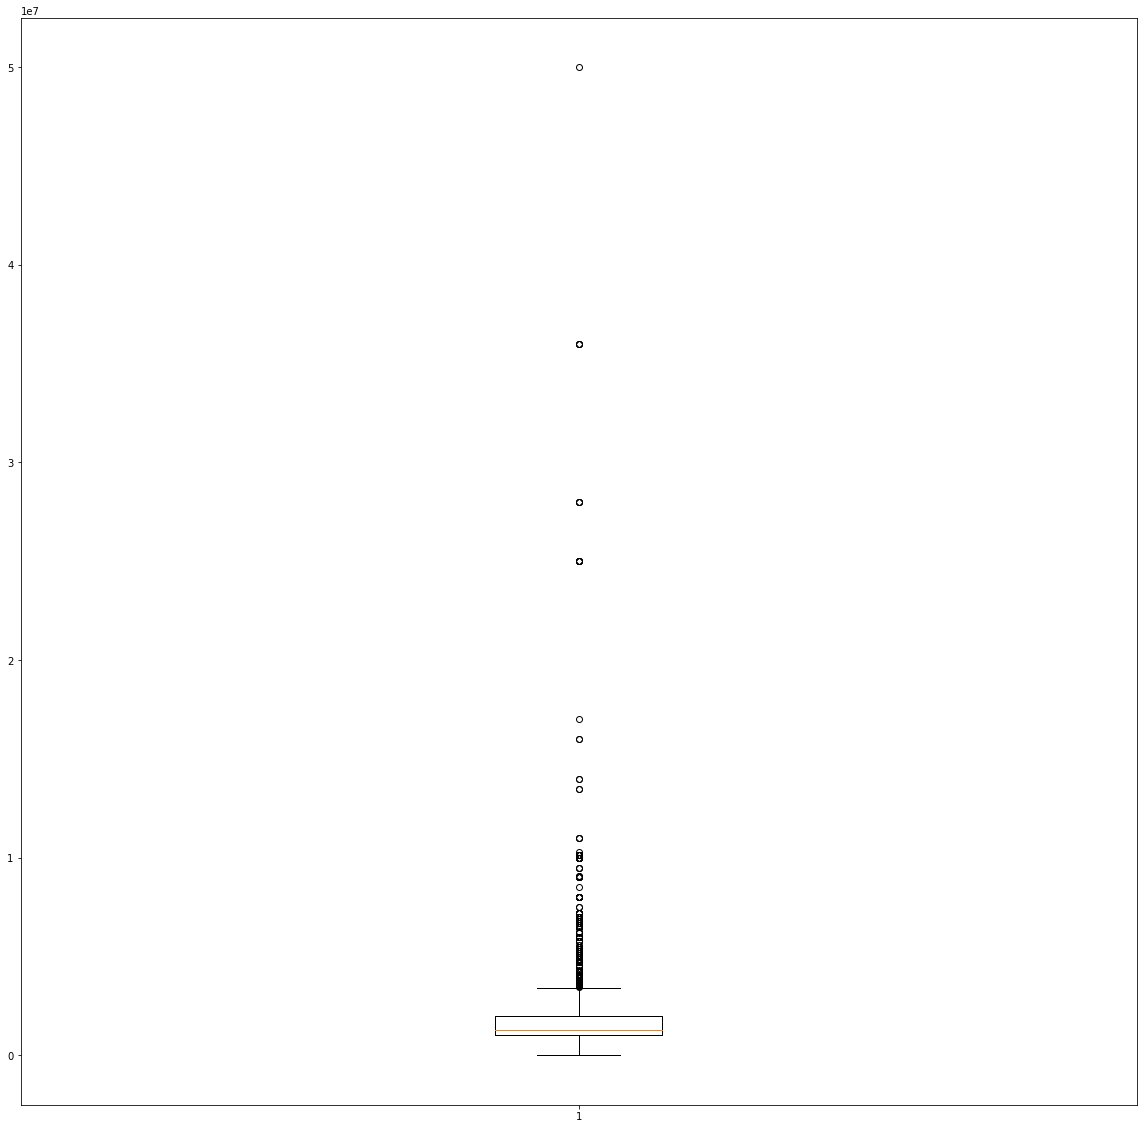

In [27]:
# visula the outliers
plt.rcParams["figure.figsize"] = (20,20)
plt.boxplot(train.price);

In [28]:
#outliers 
# removing outlier from train dataset
def is_not_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return lower_limit, upper_limit

In [29]:
l,u = is_not_outlier(train["price"])

In [30]:
train.drop(train[(train["price"] < l ) | (train["price"] >= u )].index,inplace=True)

In [31]:
# LR baseline model
baseline_model = liner_reg(train[num_cols].drop("price", axis=1), train["price"],
                            val[num_cols].drop("price", axis=1), val["price"])

training score: 0.04317
validation score: 0.03253


In [ ]:
# baseline visual
y_train_pred = baseline_model.predict(train[num_cols].drop("price", axis=1))

plt.scatter(train["price"], y_train_pred, alpha=0.2);
plt.plot([0, 400], [0, 400]);

In [ ]:
# baseline visual
y_val_pred = baseline_model.predict(val[num_cols].drop("price", axis=1))

plt.scatter(val["price"], y_val_pred, alpha=0.2)
#plt.plot([0, 400], [0, 400]);

In [32]:
# get the column names to rename it
df_r.direction.unique()

array(['جنوب', 'شرق', 'غرب', 'جنوب شرقي', 'شمال', 'شمال غربي',
       'جنوب غربي', '3 شوارع', 'شمال شرقي', '4 شوارع'], dtype=object)

In [33]:
# create dummy variable and rename the arabic column
df_r = pd.concat([df_r.drop('direction', axis=1), pd.get_dummies(df_r['direction'],drop_first=True)], axis=1)
df_r.rename(columns={'4 شوارع':'four_street','3 شوارع':'three_street','جنوب':'south','جنوب شرقي':'south_east','جنوب غربي':'south_west',
                   'شرق':'east','شمال':'north','شمال شرقي':'north_east','شمال غربي':'north_west','غرب':'west'}, inplace=True)

In [34]:
# get unique house age values
df_r.house_age.unique()

array([' 7 سنة', ' 9 سنة', ' 10 سنة', 'جديد', ' 19 سنة', ' 6 سنة',
       ' 25 سنة', ' 23 سنة', ' 2 سنة', ' 5 سنة', ' 27 سنة', ' 3 سنة',
       ' 36 سنة', ' 18 سنة', ' 30 سنة', ' 13 سنة', ' 4 سنة', ' 15 سنة',
       ' 34 سنة', ' 22 سنة', ' 12 سنة', ' 20 سنة', ' 21 سنة', ' 24 سنة',
       ' 35 سنة', ' 31 سنة', ' 33 سنة', ' 28 سنة', ' 26 سنة', ' 8 سنة',
       ' 17 سنة', ' 11 سنة', ' 16 سنة', ' 32 سنة', ' 29 سنة', ' 14 سنة'],
      dtype=object)

In [35]:
# create dummy variable 
df_r = pd.concat([df_r.drop('house_age', axis=1), pd.get_dummies(df_r['house_age'],drop_first=True)], axis=1)

In [36]:
# display the dataframe
df_r

price  area  bed  living  path street_width  views  four_street  \
0     2000000   408    7       5     5           15   1583            0   
1     4000000  1200    7       5     5           15    224            0   
2     1850000   338    7       2     5           20   2435            0   
3     4250000   675    7       3     5           20   1488            0   
4      650000   600    7       1     5           15   2863            0   
...       ...   ...  ...     ...   ...          ...    ...          ...   
6019  2800000   725    6       1     5           15  10586            0   
6020   850000   400    5       1     5           20    304            0   
6021  1100000   360    5       2     5           15    756            0   
6022  1030000   250    4       1     4           18     74            0   
6023  1300000   360    5       3     5           18    136            0   

      south  south_east  ...   34 سنة   35 سنة   36 سنة   4 سنة   5 سنة  \
0         1           0  ...        0        0        0       0       0   
1         0           0  ...        0        0        0       0       0   
2         0           0  ...        0        0        0       0       0   
3         0           0  ...        0        0        0       0       0   
4         1           0  ...        0        0        0       0       0   
...     ...         ...  ...      ...      ...      ...     ...     ...   
6019      0           0  ...        0        0        1       0       0   
6020      0           0  ...        0        0        0       0       0   
6021      0           0  ...        0        0        0       0       0   
6022      0           0  ...        0        0        0       0       0   
6023      0           0  ...        0        0        0       0       0   

       6 سنة   7 سنة   8 سنة   9 سنة  جديد  
0          0       1       0       0     0  
1          0       0       0       1     0  
2          0       1       0       0     0  
3          0       0       0       0     0  
4          0       0       0       0     1  
...      ...     ...     ...     ...   ...  
6019       0       0       0       0     0  
6020       0       0       0       0     1  
6021       0       0       0       0     1  
6022       0       0       0       0     1  
6023       0       0       0       0     1  

[6024 rows x 51 columns]

In [37]:
# convert all DataFrame columns to the int64 dtype
df_r = df_r.astype(int)

In [38]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         6024 non-null   int64
 1   area          6024 non-null   int64
 2   bed           6024 non-null   int64
 3   living        6024 non-null   int64
 4   path          6024 non-null   int64
 5   street_width  6024 non-null   int64
 6   views         6024 non-null   int64
 7   four_street   6024 non-null   int64
 8   south         6024 non-null   int64
 9   south_east    6024 non-null   int64
 10  south_west    6024 non-null   int64
 11  east          6024 non-null   int64
 12  north         6024 non-null   int64
 13  north_east    6024 non-null   int64
 14  north_west    6024 non-null   int64
 15  west          6024 non-null   int64
 16   11 سنة       6024 non-null   int64
 17   12 سنة       6024 non-null   int64
 18   13 سنة       6024 non-null   int64
 19   14 سنة       6024 non-null

In [39]:
train , test = train_test_split(df_r, test_size=.2)
train , val = train_test_split(train, test_size=.25)

In [40]:
x_train =train.drop(['price'],axis=1)
y_train =train['price']

x_val = val.drop(['price'],axis=1)
y_val = val['price']

In [41]:
train

price  area  bed  living  path  street_width  views  four_street  \
1907  1500000   435    7       2     5            15   1314            0   
5507  2050000   990    5       1     3            15   1681            0   
1709  3000000   325    5       3     5            15    208            0   
1977  1050000   317    1       2     5            20    608            0   
4410  2900000   500    5       3     4            18   1268            0   
...       ...   ...  ...     ...   ...           ...    ...          ...   
2233  4100000   510    5       5     5            20    416            0   
4985  1300000   420    4       1     3            20    174            0   
2180  1450000   360    4       2     4            20     31            0   
1848  1450000   480    3       1     5            20   3235            0   
190   1100000   390    5       1     3             5   1260            0   

      south  south_east  ...   34 سنة   35 سنة   36 سنة   4 سنة   5 سنة  \
1907      0           0  ...        0        0        0       0       0   
5507      0           0  ...        0        0        0       0       0   
1709      0           0  ...        0        0        0       0       0   
1977      1           0  ...        0        0        0       0       0   
4410      1           0  ...        0        0        0       0       0   
...     ...         ...  ...      ...      ...      ...     ...     ...   
2233      0           0  ...        0        0        0       0       1   
4985      0           0  ...        0        0        0       0       0   
2180      0           1  ...        0        0        0       0       0   
1848      1           0  ...        0        0        0       0       0   
190       0           0  ...        0        0        0       0       0   

       6 سنة   7 سنة   8 سنة   9 سنة  جديد  
1907       0       0       0       0     1  
5507       0       0       0       0     1  
1709       0       0       0       0     1  
1977       0       0       0       0     1  
4410       0       0       0       0     1  
...      ...     ...     ...     ...   ...  
2233       0       0       0       0     0  
4985       0       0       0       0     0  
2180       0       0       0       0     1  
1848       0       0       0       1     0  
190        0       0       0       0     1  

[3614 rows x 51 columns]

# Road map:

In [ ]:
#import - done

In [ ]:
#read dataset - done

In [ ]:
#EDA --> df.corr() , sns.pairplot(df), outliers by hist,  include dummy varibles drop_first=True

In [ ]:
#split
# train , test = train_test_split(df, test_size=.2)
# train , val = train_test_split(train, test_size=.25) then split to x and y after removing outlier from train


In [ ]:
# clean data
# train.isna()
# remove outlier from train (log another way to handel outlier)

In [ ]:
#baseline model  
# linear_lig() function i made it
# the train and val score must be around the same number, to made there are no overfitting (round to 3 digit after . )

In [ ]:
#cleaning --> drop some columns then run the function 

In [ ]:
#feature engineering -->

In [ ]:
#model after feature engineering

In [ ]:
#scaling ( the best experment )

In [ ]:
#model after sacling

In [ ]:
# ss = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.values) #important


# Modeling:

In [42]:
# Scale the data
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train.values)


In [43]:
expr1 = liner_reg(x_train,
                            np.log(train["price"]),
                            x_val,
                            np.log(val["price"])
                  )

training score: 0.105
validation score: 0.08945


In [44]:
# RIDGE
def ridge_model(X_train,y_train,X_val,y_val, regular_var = 1,
                CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        print("training score :", round(m.score(X_train,y_train) ,5))
        print("val score :", round(m.score(X_val,y_val),5))
    return m

In [45]:
ridge_model1 = ridge_model(x_train,
                            np.log(train["price"]),
                            x_val,
                            np.log(val["price"])
                            ,100000000
                  )

training score : 0.05457
val score : 0.06041


In [46]:
# LSSO
def lasso_model(X_train,y_train,X_val,y_val, regular_var = 1,
                CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var) 
        m.fit(X_train, y_train )

        print("training score :", round(m.score(X_train,y_train) ,5))
        print("val score :", round(m.score(X_val,y_val),5))
    return m

In [47]:
lasso_model1 = lasso_model(x_train,np.log(train["price"])
                    ,x_val,np.log(val["price"])
                    , regular_var = 0.0001) #, CV_flag = False, cv_value = 5)

training score : 0.10394
val score : 0.0926


In [54]:
lasso_model2 = lasso_model(x_train,np.log(train["price"])
                    ,x_val,np.log(val["price"])
                    , regular_var = 0.0001, CV_flag=True) 


mean error: [[0.35914319 0.29804161 0.36118286 0.34997113 0.35087891]
 [0.35452648 0.29404119 0.35437589 0.34906647 0.34592278]
 [0.34841845 0.28814723 0.35227324 0.34397005 0.34540137]]


In [55]:
#PolynomialFeatures
est = make_pipeline(PolynomialFeatures(5), LinearRegression())


In [57]:
expr3 = liner_reg(x_train,
                            np.log(train["price"]),
                            x_val,
                            np.log(val["price"])
                  )

training score: 0.105
validation score: 0.08945


In [58]:
x_train.shape

(3614, 50)

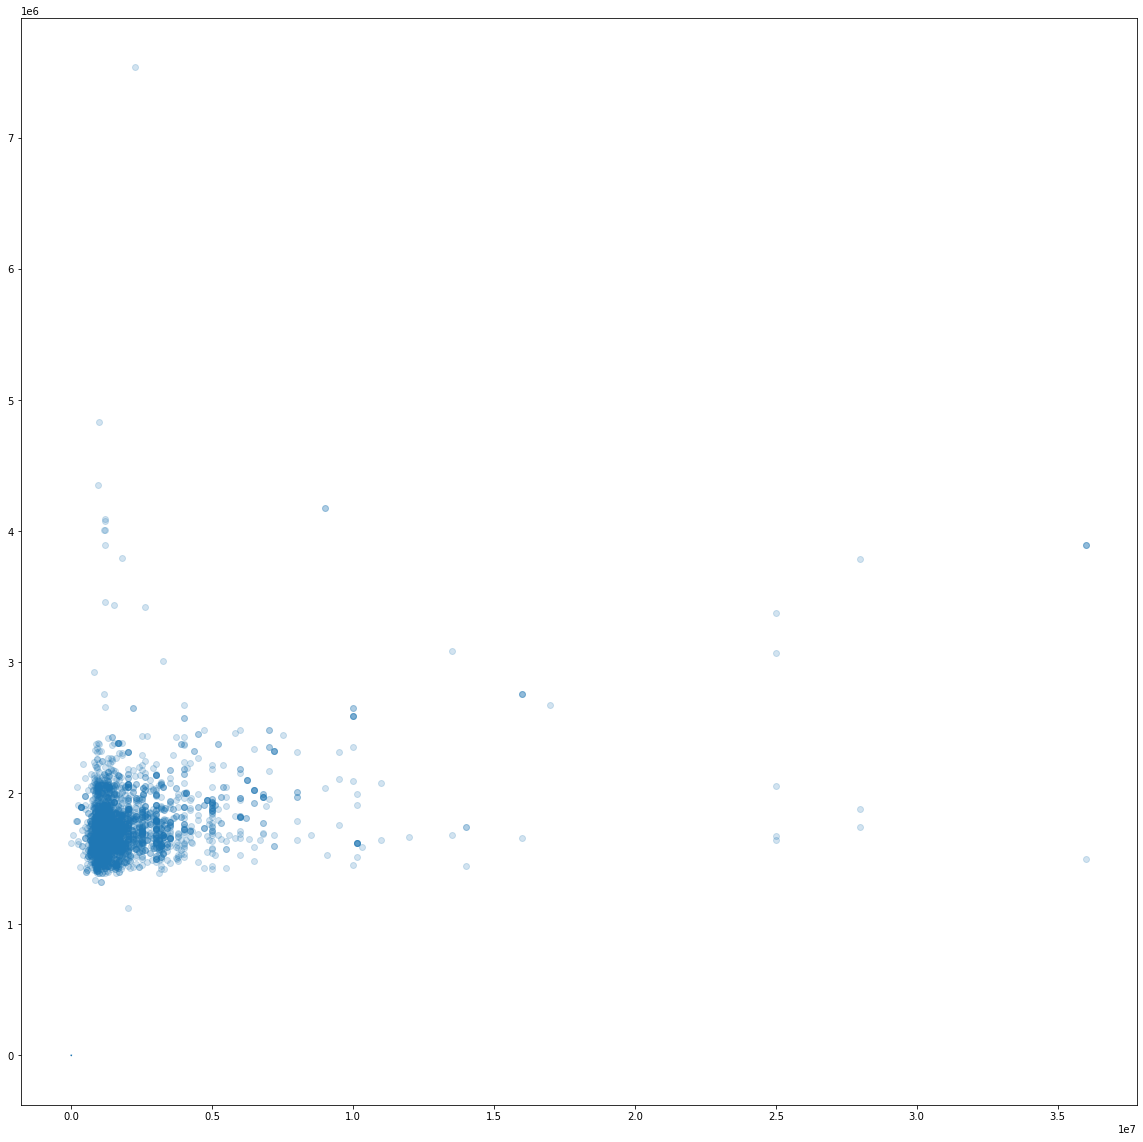

In [59]:
y_train_pred = baseline_model.predict(train[num_cols].drop("price", axis=1))
y_pred = baseline_model.predict(train[num_cols].drop("price", axis=1))
plt.scatter(train["price"], y_train_pred, alpha=0.2);
plt.plot([0, 400], [0, 400]);

In [ ]:
y_val_pred = baseline_model.predict(val[num_cols].drop("price", axis=1))

plt.scatter(val["price"],y_val_pred, alpha=0.2)
plt.plot(y_val_pred);

In [60]:
from sklearn.preprocessing import RobustScaler

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [61]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [62]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())) # mean & the standard deviation



Lasso score: 0.0002 (0.0001)



In [ ]:
# no

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
# decrease the Bias error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# Model evaluation:

In [63]:
# on the test dataset
y_val_pred = baseline_model.predict(val[num_cols].drop("price", axis=1))


In [65]:
y_val_pred.mean()

1748572.6727722315